# Insurance Fraud Claim Prediction - Step 1: Data Analysis
This notebook demonstrates how to setup a Cortex Dataset to make data analysis visual and straightforward in an interactive Python environment.

In [6]:
# Basic setup
%run ./config.ipynb

In [8]:
# Connect to Cortex 5 and create a Builder instance
cortex = Cortex.client()
builder = cortex.builder()

## Training Data Setup
Our first step is to load our training data from the target data source (in this case a local file).  The Cortex 5 SDK for Python makes extensive use of the excellent [Pandas](https://pandas.pydata.org/) library as well some other well know data analysis and visualization libraries.  In this first set of steps, we will create a Cortex Dataset using a Pandas DataFrame instantiated using the __read_csv__ function.  Cortex 5 will automatically build a rich Dataset object using the source data and prepare it for further usage.

In [45]:
train_df = pd.read_csv('../datasets/MotorInsuranceFraudClaimABTFull.csv')

In [47]:
train_ds = builder.dataset('claims-fraud/motorinsurancefraud')\
    .title('Motor Insurance Training Data')\
    .from_df(train_df).build()
    
print("%s (%s) v%d" % (train_ds.title, train_ds.name, train_ds.version))

Motor Insurance Training Data (claims-fraud/motorinsurancefraud) v4


---
As you can see below, Cortex 5 auto-discovered all of the data parameters from the DataFrame and created the nesessary schema structure.

In [50]:
train_ds.parameters

[{'name': 'ID', 'type': 'integer', 'format': 'int64'},
 {'name': 'Insurance Type ', 'type': 'string'},
 {'name': 'Income of Policy Holder', 'type': 'integer', 'format': 'int64'},
 {'name': 'Marital Status', 'type': 'string'},
 {'name': 'Num Claimants', 'type': 'integer', 'format': 'int64'},
 {'name': 'Injury Type', 'type': 'string'},
 {'name': 'Overnight Hospital Stay', 'type': 'string'},
 {'name': 'Claim Amount', 'type': 'integer', 'format': 'int64'},
 {'name': 'Total Claimed', 'type': 'integer', 'format': 'int64'},
 {'name': 'Num Claims', 'type': 'integer', 'format': 'int64'},
 {'name': 'Num Soft Tissue', 'type': 'number', 'format': 'float'},
 {'name': '% Soft Tissue', 'type': 'number', 'format': 'float'},
 {'name': 'Claim Amount Received', 'type': 'integer', 'format': 'int64'},
 {'name': 'Fraud Flag', 'type': 'integer', 'format': 'int64'}]

In [52]:
train_ds.data_dictionary(train_df)

,Attribute,Type,% Nulls,Count,Unique,Observations,Knowledge
0,% Soft Tissue,float64,0.000,500,9,max=2.0 | min=0.0 | mean=0.17,
1,Claim Amount,int64,0.000,500,493,max=270200 | min=-99999 | mean=16373.2,
2,Claim Amount Received,int64,0.000,500,329,max=295303 | min=0 | mean=13051.94,
3,Fraud Flag,int64,0.000,500,2,max=1 | min=0 | mean=0.34,
4,ID,int64,0.000,500,500,max=500 | min=1 | mean=250.5,
5,Income of Policy Holder,int64,0.000,500,171,max=71284 | min=0 | mean=13739.99,
6,Injury Type,object,0.000,500,4,Sample: Broken Limb | Back | Soft Tissue,
7,Insurance Type,object,0.000,500,1,Sample: CI,
8,Marital Status,object,0.660,170,3,Sample: Married | Single | Divorced,
9,Num Claimants,int64,0.000,500,4,max=4 | min=1 | mean=1.91,


In [54]:
viz = train_ds.visuals(train_df, figsize=(24,9))

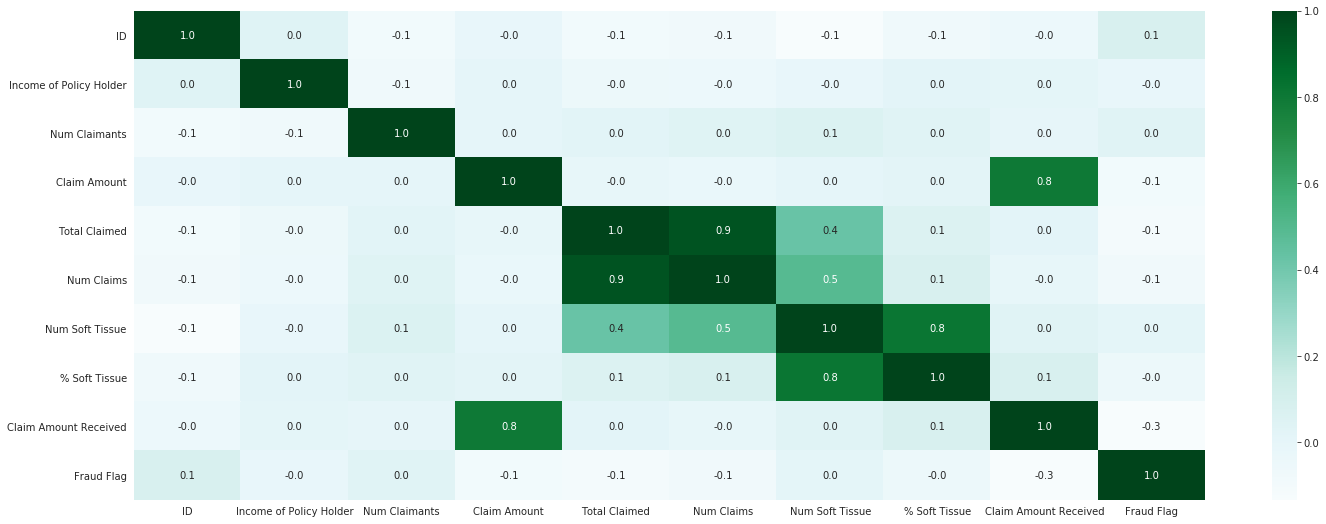

<Figure size 1728x648 with 0 Axes>

In [56]:
viz.show_corr_heatmap()

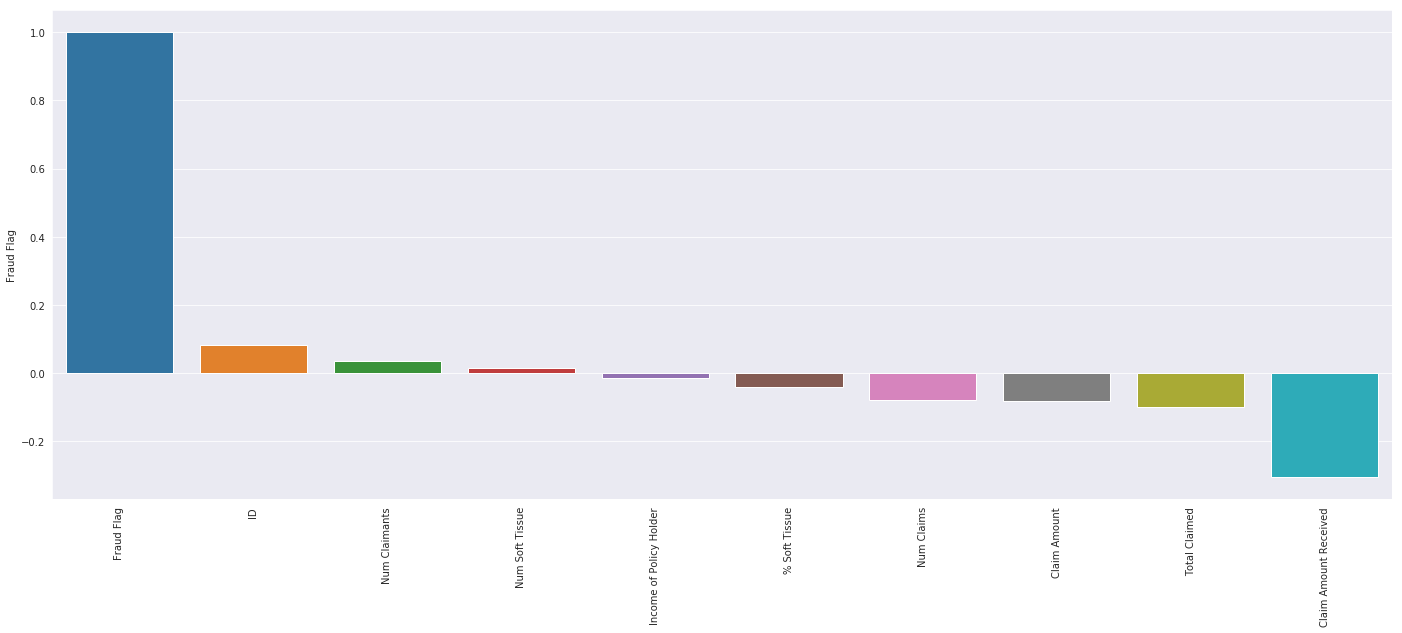

<Figure size 1728x648 with 0 Axes>

In [58]:
viz.show_corr('Fraud Flag')

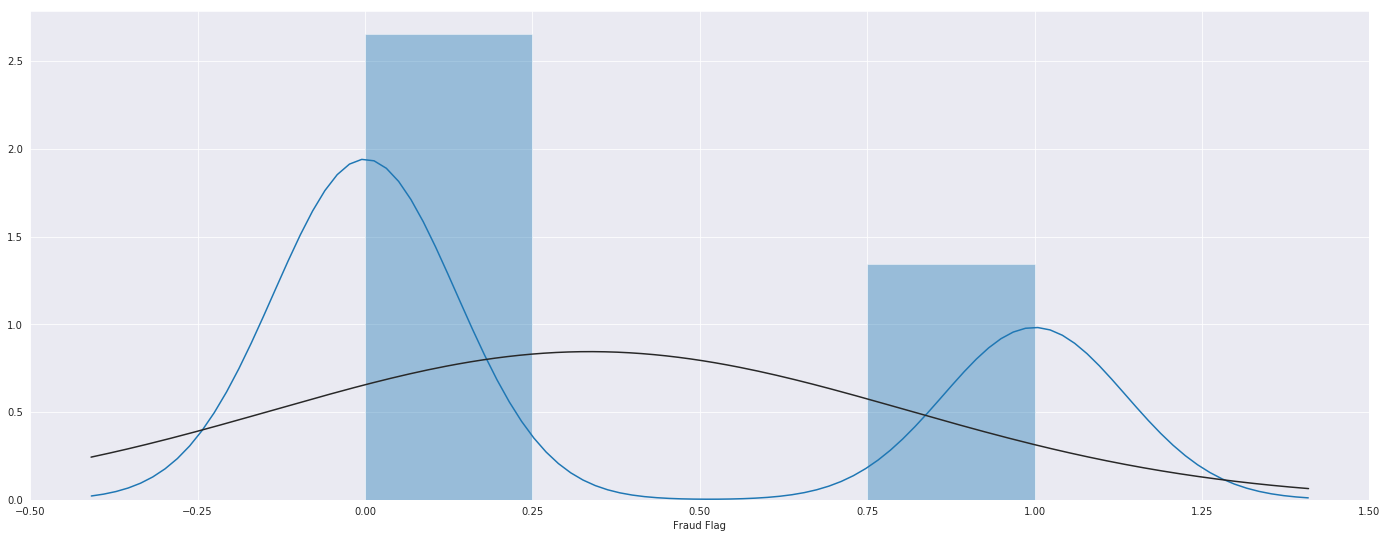

<Figure size 1728x648 with 0 Axes>

In [60]:
viz.show_dist('Fraud Flag')

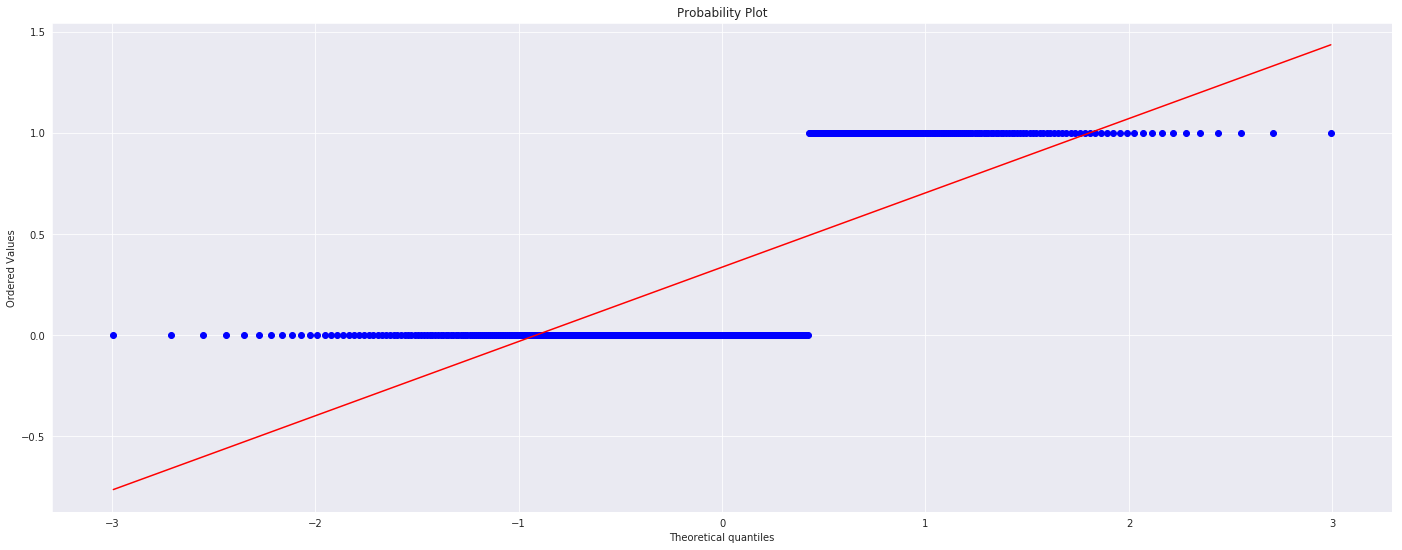

<Figure size 1728x648 with 0 Axes>

In [62]:
viz.show_probplot('Fraud Flag')

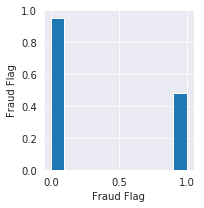

<Figure size 1728x648 with 0 Axes>

In [64]:
viz.show_corr_pairs('Fraud Flag', threshold=0.7)

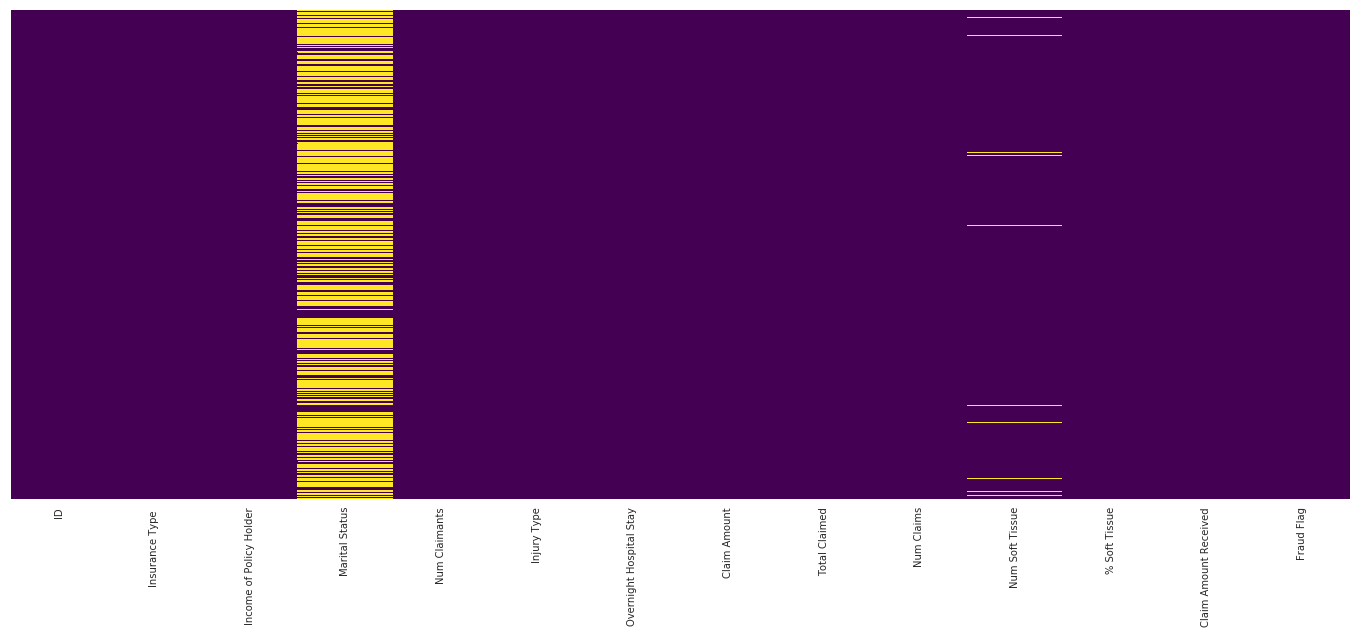

<Figure size 1728x648 with 0 Axes>

In [66]:
viz.show_missing()